In [13]:
# https://cmry.github.io/notes/euclidean-v-cosine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])
df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
#df
ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1] # assume this category is unknown
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)
print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))

x0_n = l1_normalize(x0)
x1_n = l1_normalize(x1)
print("normalized: ", x0_n, x1_n)

print("vectors \t", x0_n, x1_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x1_n), "\n"
      "cosine \t\t", cosine_similarity(x0_n, x1_n))

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]
 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001
 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174
vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556
normalized:  [0.515625 0.484375] [0.49489796 0.50510204]
vectors 	 [0.515625 0.484375] [0.49489796 0.50510204] 
euclidean 	 0.029312462230309616 
cosine 		 0.9991413385403558


In [1]:
# Hellinger metric and Jaccard index
import math
import numpy as np

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(q[idx]))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def main():
    X = np.array([[1., 2., 1],
              [2., 4., 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])
    
    print('helling:', hellingm([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('euclid:', euclid([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('cosine:', cosine([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('jacc:', jaccind({1,2,3,4}, {2,3,4,5}))
    
    print()
    
    x0 = X[7][:-1]
    x1 = X[8][:-1]
    print("regular: ", x0, x1)
    print('helling:', hellingm(x0, x1))
    print('euclid:', euclid(x0, x1))
    print('cosine:', cosine(x0, x1))
    print('minkov p=4:', minkovfr(x0, x1, 4))
    print('fract p=0.2:', minkovfr(x0, x1, 0.2))
    
    print()
    x0_n = l1_norm(x0)
    x1_n = l1_norm(x1)
    print("L1-norm: ", x0_n, x1_n)
    print('helling:', hellingm(x0_n, x1_n))
    print('euclid:', euclid(x0_n, x1_n))
    print('cosine:', cosine(x0_n, x1_n))
    print('minkov p=4:', minkovfr(x0_n, x1_n, 4))
    print('fract p=0.2:', minkovfr(x0_n, x1_n, 0.2))       

    print()
    x0_n = l2_norm(x0)
    x1_n = l2_norm(x1)
    print("L2-norm: ", x0_n, x1_n)
    print('helling:', hellingm(x0_n, x1_n))
    print('euclid:', euclid(x0_n, x1_n))
    print('cosine:', cosine(x0_n, x1_n))
    print('minkov p=4:', minkovfr(x0_n, x1_n, 4))
    print('fract p=0.2:', minkovfr(x0_n, x1_n, 0.2))
    
if __name__=='__main__':
    main()

helling: 0.4397484841235158
euclid: 0.6
cosine: 1.0215078369104982
jacc: 0.6

regular:  [6.5 6.4] [6.3 5.8]
helling: 0.09034828719135093
euclid: 0.6324555320336764
cosine: 0.11311325139321936
minkov p=4: 0.6018433396869133
fract p=0.2: 11.42401086259046

L1-norm:  [0.50387597 0.49612403] [0.52066116 0.47933884]
helling: 0.011872914294613929
euclid: 0.02373784056260818
cosine: 1.413191532186627
minkov p=4: 0.019961065034961437
fract p=0.2: nan

L2-norm:  [0.71256682 0.70160425] [0.73569822 0.67730947]
helling: 0.014120475850765184
euclid: 0.0335454625980808
cosine: 0.9997186359018924
minkov p=4: 0.028225197377708088
fract p=0.2: nan


d:\anaconda\envs\venv\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [23]:
# test: read study protocol and summarize
from gensim.summarization.summarizer import summarize
import os
import PyPDF2
import re
#import subprocess

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def loadids():
    '''load id-title list'''
    with open('bsc_idlst0.txt', encoding="utf-8") as f:
        data = json.load(f)
    return data

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt): # save corpus
    # save corpus as separate file
    os.chdir(r'C:\Users\Bernie\Documents\ML4D\lrgtxt0') # change this directory to save to a different location
    fout = open('bsc_pdf_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def main():
    #os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # all pdf-files in this directory will be processed
    # get all pdf filenames
    #pdfFiles = []
    #for filename in os.listdir('.'):
        #if filename.endswith('.pdf'):
            #pdfFiles.append(filename)
    #pdfFiles.sort(key = str.lower)
    
    #subprocess.call(['pdftotext', 'forms.pdf', 'output'])
    
    #outtext = ''
    #print(pdfFiles)
    #for pdfFileObj in pdfFiles:
        #pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        #npgs = pdfReader.numPages
        ##print('pages read:', npgs)
        #for i in range(npgs):
            #pageObj = pdfReader.getPage(i) # get a page object (pages are 0-based)
            #print(pageObj.extractText()[:20]) # get the text
            #outtext += str(pageObj.extractText().encode('utf-8'))
            #outtext += pageObj.extractText()
    #print(outtext[:500])
    #save_corpus(outtext)
    #print('%s' % (summarize(corpus[atxidx:nxtid]))) # auto-summarize results
    
    os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # change this directory to save to a different location
    fin = open('studsumm0 raw.txt', encoding="utf-8")
    text = ''
    pattern0 = r"\d*\.\d*\.\d+\.\d+ \w"
    pattern1 = r"\d*\.\d+\.\d+ \w"
    pattern2 = r"\d+\.\d+ \w"
    for piece in read_in_chunks(fin):   
        #print(summarize(piece, ratio=0.6))
        for subt1 in re.findall(pattern1, piece, re.IGNORECASE):
            for subt0 in re.findall(pattern0, piece, re.IGNORECASE):
                print(subt0)
        #text += ' ' + summarize(piece, ratio=0.1)
        
    #print(text)
    
if __name__=="__main__": 
    main()

6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P
6.2.1.1 P
2.1.1.1 a
2.1.1.2 f
2.1.1.1 P
2.1.1.2 P


In [1]:
# compound duration
def compd(s):
    '''return the compund duration from seconds s'''
    conv_lst = [604800, 86400, 3600, 60]
    res = []
    for cf in conv_lst:
        if s >= cf:
            nint = s // cf
            res.append(nint)
            s -= nint * cf
    return res

if __name__=="__main__":
    print(compd(7259))
    print(compd(86400))
    print(compd(6000000))

[2]
[1]
[9, 6, 10, 40]


In [20]:
from gensim.summarization.summarizer import summarize

piece = '''Purpose To evaluate moderate (grade 2, hemoglobin <10 g/dl) and severe
    (grade 3+, hemoglobin <8 g/dl) anemia as potential risk factors for DDR in the
    first line course of chemotherapy. While chemotherapy-induced neutropenia has been
    shown to be associated with dose delay/reduction (DDR) in several studies, the effect
    of anemia is less well studied. Methods We identified 3955 Kaiser Permanente patients
    diagnosed with incident non-Hodgkin’s lymphoma (n = 574), breast (n = 2043), lung (n = 463),
    gastric (n = 113), ovarian (n = 204), or colorectal cancers (n = 558) between 2010 and 2012.
    Generalized linear mixed effects models were used to study the effect of anemia in subsequent
    cycles, adjusting for demographics, comorbidities, chemotherapy cycle, neutropenia, thrombocytopenia,
    and liver and renal function. Results We found that moderate (grade 2) to severe (grade 3–4)
    anemia increased the risk of DDR in subsequent chemotherapy cycles [odds ratio (OR) = 1.46,
    95 % CI (1.32, 1.62) and OR = 2.02 (1.41, 2.89)], respectively, compared to grade 1 or no anemia.
    Both stage I–III and IV patients with grade 2 or greater anemia were at higher risk for DDR than
    patients with grade 1 or no anemia [ORstage IV, grade 2 = 1.94 (1.58, 2.38); ORstage IV,
    grade 3/4 = 2.83 (1.42, 5.62) and ORstage I–III, grade 2 = 1.33 (1.18, 1.49); ORstage I–III,
    grade 3–4 = 1.81 (1.18, 2.76)]. Conclusions These results provide insight into novel risk factors
    for chemotherapy dose modification that may inform clinicians on management strategies
    to optimize treatment outcomes.'''
print(summarize(piece, ratio=0.1))

(grade 3+, hemoglobin <8 g/dl) anemia as potential risk factors for DDR in the
Both stage I–III and IV patients with grade 2 or greater anemia were at higher risk for DDR than


In [14]:
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences
import re

#reg_ex = r'[^a-zA-Z]'
#replace = ' '
piece = input("Enter text to be summarized: ").replace('\n', ' ').replace('\r', ' ')
#piece = input("Enter text to be summarized: ").replace('\n\r', ' ').strip()
#piece = piece.replace(reg_ex, replace)
piece = re.sub(' +', ' ', piece)
#print(split_sentences(piece))
#comp_df.apply(lambda t: ' '.join([wordnet_lemmatizer.lemmatize(w) for w in t.split()])).str.lower()
print('++++++++++++++++++++++++++++++++++++++')
print(summarize(piece, ratio=0.2)) # high enough for abstracts with longer sentences!

Enter text to be summarized: Background: Benefits of prophylactic hematopoietic colony-stimulating factors (CSFs) in adults and children receiving cancer chemotherapy or undergoing stem-cell transplantation (SCT) are unclear.  Purpose: To determine whether prophylactic CSFs decrease mortality, infections, and febrile neutropenia more than does placebo or no therapy in patients with cancer and in patients undergoing SCT.  Data sources: Electronic searches of Ovid MEDLINE and EMBASE from inception until April 2007 and of the Cochrane Central Register of Controlled Trials until the second quarter of 2006.  Study selection: We selected 148 trials that were reported in any language that randomly assigned patients to CSFs or to either placebo or no therapy. Prophylactic CSFs were given concurrently with or after initiation of chemotherapy.  Data extraction: Two reviewers independently extracted data onto standardized forms.  Data synthesis: Short-term all-cause mortality appeared to be simil

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bscho\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
# another summarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

def _create_frequency_table(text_string) -> dict:

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

text = '''Purpose To evaluate moderate (grade 2, hemoglobin <10 g/dl) and severe
    (grade 3+, hemoglobin <8 g/dl) anemia as potential risk factors for DDR in the
    first line course of chemotherapy. While chemotherapy-induced neutropenia has been
    shown to be associated with dose delay/reduction (DDR) in several studies, the effect
    of anemia is less well studied. Methods We identified 3955 Kaiser Permanente patients
    diagnosed with incident non-Hodgkin’s lymphoma (n = 574), breast (n = 2043), lung (n = 463),
    gastric (n = 113), ovarian (n = 204), or colorectal cancers (n = 558) between 2010 and 2012.
    Generalized linear mixed effects models were used to study the effect of anemia in subsequent
    cycles, adjusting for demographics, comorbidities, chemotherapy cycle, neutropenia, thrombocytopenia,
    and liver and renal function. Results We found that moderate (grade 2) to severe (grade 3–4)
    anemia increased the risk of DDR in subsequent chemotherapy cycles [odds ratio (OR) = 1.46,
    95 % CI (1.32, 1.62) and OR = 2.02 (1.41, 2.89)], respectively, compared to grade 1 or no anemia.
    Both stage I–III and IV patients with grade 2 or greater anemia were at higher risk for DDR than
    patients with grade 1 or no anemia [ORstage IV, grade 2 = 1.94 (1.58, 2.38); ORstage IV,
    grade 3/4 = 2.83 (1.42, 5.62) and ORstage I–III, grade 2 = 1.33 (1.18, 1.49); ORstage I–III,
    grade 3–4 = 1.81 (1.18, 2.76)]. Conclusions These results provide insight into novel risk factors
    for chemotherapy dose modification that may inform clinicians on management strategies
    to optimize treatment outcomes.'''

# 1 Create the word frequency table
freq_table = _create_frequency_table(text)

'''
We already have a sentence tokenizer, so we just need 
to run the sent_tokenize() method to create the array of sentences.
'''

# 2 Tokenize the sentences
sentences = sent_tokenize(text)

# 3 Important Algorithm: score the sentences
sentence_scores = _score_sentences(sentences, freq_table)

# 4 Find the threshold
threshold = _find_average_score(sentence_scores)

# 5 Important Algorithm: Generate the summary
summary = _generate_summary(sentences, sentence_scores, 2.8 * threshold) # the higher the multiplier the shorter

print(summary)

 Purpose To evaluate moderate (grade 2, hemoglobin <10 g/dl) and severe
    (grade 3+, hemoglobin <8 g/dl) anemia as potential risk factors for DDR in the
    first line course of chemotherapy. While chemotherapy-induced neutropenia has been
    shown to be associated with dose delay/reduction (DDR) in several studies, the effect
    of anemia is less well studied.


In [3]:
# test 2: read study protocol and summarize
from gensim.summarization.summarizer import summarize
import os
import PyPDF2
import re
#import subprocess

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    '''read file in chunks via iterator'''
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def loadids():
    '''load id-title list'''
    with open('bsc_idlst0.txt', encoding="utf-8") as f:
        data = json.load(f)
    return data

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt): # save corpus
    # save corpus as separate file
    os.chdir(r'C:\Users\Bernie\Documents\ML4D\lrgtxt0') # change this directory to save to a different location
    fout = open('bsc_pdf_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def main():
    #os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # all pdf-files in this directory will be processed
    # get all pdf filenames
    #pdfFiles = []
    #for filename in os.listdir('.'):
        #if filename.endswith('.pdf'):
            #pdfFiles.append(filename)
    #pdfFiles.sort(key = str.lower)
    
    #subprocess.call(['pdftotext', 'forms.pdf', 'output'])
    
    #outtext = ''
    #print(pdfFiles)
    #for pdfFileObj in pdfFiles:
        #pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        #npgs = pdfReader.numPages
        ##print('pages read:', npgs)
        #for i in range(npgs):
            #pageObj = pdfReader.getPage(i) # get a page object (pages are 0-based)
            #print(pageObj.extractText()[:20]) # get the text
            #outtext += str(pageObj.extractText().encode('utf-8'))
            #outtext += pageObj.extractText()
    #print(outtext[:500])
    #save_corpus(outtext)
    #print('%s' % (summarize(corpus[atxidx:nxtid]))) # auto-summarize results
    
    os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # change this directory to save to a different location
    fin = open('studsumm0 raw.txt', encoding="utf-8")
    
    # chapter headings: match newline - number - whitespaces - title
    chptr_plst = ['\s\d\s+Introduction', '\s\d\s+Objectives and endpoints', '\s\d\s+Study design', '\s\d\s+Rationale'\
                  , '\s\d\s+Population', '\s\d\s+Treatment', '\s\d\s+Informed consent procedures'\
                  , '\s\d\s+Visit schedule and assessments', '\s\d\s+Study discontinuation and completion'\
                  , '\s\d+\s+Safety monitoring and reporting', '\s\d+\s+Data Collection and Database management'\
                  , '\s\d+\s+Data analysis and statistical methods'\
                  , '\s\d+\s+Ethical considerations and administrative procedures', '\s\d+\s+Protocol adherence'\
                  , '\s\d+\s+References', '\s\d+\s+Appendices']
    
    text = ''
    #pattern0 = r"\d*\.\d*\.\d+\.\d+ \w|\d*\.\d+\.\d+ \w|\[1-9]\.\d+ \w" # |=or pattern match
    pattern0 = r"\d*\.\d*\.\d+\.\d+ [A-Z]|\d*\.\d+\.\d+ [A-Z]|\[1-9]\.\d+ [A-Z]" # |=or pattern match
    #pattern1 = r"\d*\.\d+\.\d+ \w"
    #pattern2 = r"\d+\.\d+ \w"
    for piece in read_in_chunks(fin):
        text += piece
        #print(summarize(piece, ratio=0.6))
    #for subt0 in re.findall(pattern0, text, re.IGNORECASE):
        #for subt0 in re.findall(pattern0, text, re.IGNORECASE):
        #print(subt0)
    
    # for each chapter
    for cpat in chptr_plst:
        #print(re.findall(cpat, text))
        for ctr, chdr in enumerate(re.finditer(cpat, text)):
            print(ctr, ': ', chdr)
        
    # fetch chapters
    for ctr, chdr in enumerate(re.finditer(pattern0, text)):
        print(ctr, ': ', chdr)
        
        
    #text += ' ' + summarize(piece, ratio=0.1)
    #print(text)
    
    chpt_txt = re.split(pattern0, text)
    #print(chpt_txt)
    for ctr, chptr in enumerate(chpt_txt):
        print('section: ', ctr)
        if len(chptr) > 200 and chptr.find('.') > 0:
            try:
                print(summarize(chptr, ratio=0.1))
            except ValueError:
                print(chptr)
    
if __name__=="__main__": 
    main()

0 :  <_sre.SRE_Match object; span=(1473, 1488), match='\n1 Introduction'>
1 :  <_sre.SRE_Match object; span=(42971, 42986), match='\n1 Introduction'>
0 :  <_sre.SRE_Match object; span=(2133, 2160), match='\n2 Objectives and endpoints'>
1 :  <_sre.SRE_Match object; span=(65547, 65574), match='\n2 Objectives and endpoints'>
0 :  <_sre.SRE_Match object; span=(2261, 2276), match='\n3 Study design'>
1 :  <_sre.SRE_Match object; span=(71226, 71241), match='\n3 Study design'>
0 :  <_sre.SRE_Match object; span=(2397, 2409), match='\n4 Rationale'>
1 :  <_sre.SRE_Match object; span=(82465, 82477), match='\n4 Rationale'>
0 :  <_sre.SRE_Match object; span=(3744, 3757), match='\n5 Population'>
1 :  <_sre.SRE_Match object; span=(108665, 108678), match='\n5 Population'>
0 :  <_sre.SRE_Match object; span=(4132, 4144), match='\n6 Treatment'>
1 :  <_sre.SRE_Match object; span=(120159, 120171), match='\n6 Treatment'>
0 :  <_sre.SRE_Match object; span=(6962, 6992), match='\n7 Informed consent procedures'>

Clinical Trial Protocol CINC424H12201
Clinical Trial Protocol Template Version 2.0 dated 01-Aug-2018
section:  1
section:  2

section:  3
section:  4
section:  5
section:  6
section:  7
section:  8
section:  9

section:  10
section:  11
section:  12
section:  13
section:  14

section:  15
section:  16
section:  17
section:  18

section:  19
section:  20
section:  21
section:  22
section:  23

section:  24
section:  25
section:  26
section:  27

section:  28
section:  29

section:  30
section:  31
section:  32

section:  33
section:  34
section:  35
section:  36

section:  37
section:  38
section:  39

section:  40
section:  41
section:  42
section:  43

section:  44
section:  45
section:  46
section:  47
section:  48
section:  49
section:  50

section:  51
section:  52
section:  53
section:  54

section:  55
section:  56
section:  57
section:  58

section:  59
section:  60
section:  61
section:  62
NA .....................................................................................

Part 2 subjects will be randomized to one of the treatment arms (Section 3) in a ratio of 1:1:1:1
Part 3 subjects will be randomized to one of the selected treatment arms (Section 3) in a ratio
The IRT will assign a randomization number to the subject,
As outlined in Section 3, the proposed RP2D of siremadlin for the combination treatment is not
section:  98
section:  99
As outlined in Section 5 patients must be on a stable ruxolitinib dose for at least 8 weeks prior
This dose was chosen based on prior single agent safety data in subjects with solid and
For crizanlizumab the dose level chosen to be evaluated in this trial is 5 mg/kg IV infusion (with
For MBG453 the dose level chosen to be evaluated in this trial is 800 mg IV Q4W.
section:  100
Table 6-2 describes the starting dose and the dose levels that may be evaluated during this trial
section:  101
period to be considered evaluable for dose escalation decisions.
Dose escalation decisions will be made by Investigators and Novartis 

described below are met, an MRI/CT scan will be conducted to confirm spleen size progression.
In case any of the criteria for progressive spleen size as described above are met, MRI/CT scan
section:  128

section:  129
 Progressive splenomegaly as assessed by increasing spleen volume (by MRI/CT) of ≥
 Accelerated phase defined by an increase in circulating peripheral blood blast content of >
For the PFS assessment progressive splenomegaly is defined as an increased spleen volume
The progression date will be the date of MRI/CT assessment confirming spleen volume increase
section:  130
Bone marrow fibrosis will be measured in grades from samples obtained from subjects at
Table 8-5 Bone Marrow Assessment Collection Plan
* Bone marrow biopsies collected within 8 weeks of C1D1 are acceptable for baseline assessment.
The bone marrow aspirate should be assessed at local
Changes in bone marrow fibrosis of at least 1 grade will be assessed as a secondary endpoint in
section:  131
These includ

unintended sign [including abnormal laboratory findings], symptom or disease) in a subject or
clinical investigation subject after providing written informed consent for participation in the
The occurrence of adverse events must be sought by non-directive questioning of the subject at
Adverse events must be recorded under the signs, symptoms, or diagnosis associated with them,
Adverse events (including lab abnormalities that constitute AEs) should be described using a
Adverse event monitoring should be continued for at least 30 days after the last dose of singleagent
should not be reported as a serious adverse event.
Abnormal laboratory values or test results constitute adverse events only if they fulfill at least
section:  148
An SAE is defined as any adverse event [appearance of (or worsening of any pre-existing)]
 is medically significant, e.g. defined as an event that jeopardizes the subject or may
life threatening or result in death or hospitalization but might jeopardize the sub

In [2]:
# Gregorian

def ydays(yr):
    days = 365
    if yr % 4 == 0 and yr % 100 != 0:
        days += 1
    if yr % 400 == 0:
        days += 1
    return days

def main():
    #print(ydays(2020))
    #print(ydays(1600))
    ty = 0
    for y in range(100000):
        ty += ydays(y)
    print(ty / 100000.)
    
if __name__=="__main__": 
    main()

365.2425


In [1]:
# Minimal steps down to 1

def mins1(n, div, sub): # still simple, not optimal
    '''minimum steps to 1 with divisors div and subtractors sub'''
    ctr = 0
    while n > 1:
        for d in div:
            if n % d == 0:
                n /= d
                ctr += 1
            else:
                for s in sub:
                    if (n - s) % d == 0:
                        n = (n - s) / d
                        ctr += 2
    return (n, ctr)

def main():
    print(mins1(7, [2], [1]))
    print(mins1(23, [2], [1]))
    print(mins1(11, [2,3], [1]))
    
if __name__=="__main__": 
    main()

(1.0, 4)
(1.0, 7)
(0.0, 7)


In [3]:
# test 3: read study protocol and summarize
from gensim.summarization.summarizer import summarize
import os
import PyPDF2
import re
#import subprocess

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    '''read file in chunks via iterator'''
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def loadids():
    '''load id-title list'''
    with open('bsc_idlst0.txt', encoding="utf-8") as f:
        data = json.load(f)
    return data

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt): # save corpus
    # save corpus as separate file
    os.chdir(r'C:\Users\Bernie\Documents\ML4D\lrgtxt0') # change this directory to save to a different location
    fout = open('bsc_pdf_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def main():
    #os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # all pdf-files in this directory will be processed
    # get all pdf filenames
    #pdfFiles = []
    #for filename in os.listdir('.'):
        #if filename.endswith('.pdf'):
            #pdfFiles.append(filename)
    #pdfFiles.sort(key = str.lower)
    
    #subprocess.call(['pdftotext', 'forms.pdf', 'output'])
    
    #outtext = ''
    #print(pdfFiles)
    #for pdfFileObj in pdfFiles:
        #pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        #npgs = pdfReader.numPages
        ##print('pages read:', npgs)
        #for i in range(npgs):
            #pageObj = pdfReader.getPage(i) # get a page object (pages are 0-based)
            #print(pageObj.extractText()[:20]) # get the text
            #outtext += str(pageObj.extractText().encode('utf-8'))
            #outtext += pageObj.extractText()
    #print(outtext[:500])
    #save_corpus(outtext)
    #print('%s' % (summarize(corpus[atxidx:nxtid]))) # auto-summarize results
    
    os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # change this directory to save to a different location
    fin = open('studsumm0 raw.txt', encoding="utf-8")
    
    # chapter headings: match newline - number - whitespaces - title
    chptr_plst = ['\s\d+\s+Introduction', '\s\d+\s+Objectives and endpoints', '\s\d+\s+Study design', '\s\d+\s+Rationale'\
                  , '\s\d+\s+Population', '\s\d+\s+Treatment', '\s\d+\s+Informed consent procedures'\
                  , '\s\d+\s+Visit schedule and assessments', '\s\d+\s+Study discontinuation and completion'\
                  , '\s\d+\s+Safety monitoring and reporting', '\s\d+\s+Data Collection and Database management'\
                  , '\s\d+\s+Data analysis and statistical methods'\
                  , '\s\d+\s+Ethical considerations and administrative procedures', '\s\d+\s+Protocol adherence'\
                  , '\s\d+\s+References', '\s\d+\s+Appendices']
    
    text = ''
    #pattern0 = r"\d*\.\d*\.\d+\.\d+ \w|\d*\.\d+\.\d+ \w|\[1-9]\.\d+ \w" # |=or pattern match
    pattern0 = r"\d*\.\d*\.\d+\.\d+ [A-Z]|\d*\.\d+\.\d+ [A-Z]|\[1-9]\.\d+ [A-Z]" # |=or pattern match
    #pattern1 = r"\d*\.\d+\.\d+ \w"
    #pattern2 = r"\d+\.\d+ \w"
    for piece in read_in_chunks(fin): # compile text from file
        text += piece
        #print(summarize(piece, ratio=0.6))
    #for subt0 in re.findall(pattern0, text, re.IGNORECASE):
        #for subt0 in re.findall(pattern0, text, re.IGNORECASE):
        #print(subt0)
        
    #maincptdict = {}
    seplst = [] # chapter separation list
    
    # for each chapter
    for cpat in chptr_plst:
        #print(re.findall(cpat, text))
        for ctr, chdr in enumerate(re.finditer(cpat, text)):
            #print(ctr, ': ', chdr)
            #maincptdict[cpat] = chdr.span()
            seplst.append(chdr.span()[0])
            
    #print(maincptdict)
    #print(seplst)
    
    subclst = [] # subchapter separation list
    for cidx in range(len(seplst) - 1): # main chapters split
        thisclst = []
        for ctr, chptr in enumerate(re.finditer(pattern0, text[seplst[cidx]:seplst[cidx+1]])):
            #print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
            thisclst.append(chptr.span()[0])
        subclst.append(thisclst)
    
    #print(subclst)
    
    ctr = 0
    for cidx in range(len(seplst) - 1):
        print('section: ', ctr, 'for main index ', cidx, ' : ', chptr_plst[cidx // 2][8:])
        ctr += 1
        for scidx in range(len(subclst[cidx]) - 1):
            if subclst is not []:
                chptr = text[subclst[cidx][scidx]:subclst[cidx][scidx+1]]
                if len(chptr) > 100 and chptr.find('.') > 0:
                    #print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
                    print('chptr: ', chptr[:30])
                    try:
                        print(summarize(chptr, ratio=0.2))
                    except ValueError:
                        pass
    
            
    # fetch chapters
    #for ctr, subchdr in enumerate(re.finditer(pattern0, text[chdr.span[0]:chdr.span[0]])):
        #print(ctr, ': ', subchdr) 
        
    #text += ' ' + summarize(piece, ratio=0.1)
    #print(text)
    
    '''for cidx in range(len(seplst) - 1): # main chapters split
        chpt_txt = re.split(pattern0, text[seplst[cidx]:seplst[cidx+1]])
        #print(chpt_txt)
        for ctr, chptr in enumerate(chpt_txt):
        #for ctr, chptr in enumerate(re.finditer(pattern0, text[seplst[cidx]:seplst[cidx+1]])):
            print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
            if len(chptr) > 100 and chptr.find('.') > 0:
                print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
                #print(chptr.match())
                try:
                    print(summarize(chptr, ratio=0.2))
                except ValueError:
                    #print(chptr)
                    pass'''
    
if __name__=="__main__": 
    main()

section:  0 for main index  0  :  Introduction
chptr:  ished, or otherwise disclosed

Clinical Trial Protocol Template Version 2.0 dated 01-Aug-2018
List of tables ........................................................................................................................5
chptr:   treatments ..................
4.1 Rationale for study design .....................................................................................32
chptr:  4 Rationale for biomarkers....

chptr:  1
6.5.1 Dose escalation guidel
chptr:  ent guidance..................
chptr:  reatment compliance...........

chptr:   .............................
chptr:  udy treatment and additional t

chptr:  1 Screening ..................

chptr:  afety and tolerability........
chptr:  ments.........................

chptr:  l Outcome Assessments (COAs) .

chptr:  
Clinical Trial Protocol (Vers

chptr:  127
12.3 Treatments ..........
chptr:  5
Clinical Trial Protocol (Ver
12.8.1 Primary endpoint(s)................

some patients with ET or PV develop a PMF-like phenotype over time, referred to as post-ET
The only potential curative treatment for MF is allogeneic hematopoietic stem cell
treatment options remain primarily palliative and aimed at controlling disease symptoms,
Aberrant activation of JAKs has been associated with increased malignant cell proliferation and
pathways implicated in the proliferation and survival of malignant cells including members of
pharmacological treatment for MF patients with splenomegaly and/or clinical symptoms and is
Although ruxolitinib has changed the treatment paradigm of
Combination therapies of ruxolitinib with novel agents may deliver
transformational clinical benefits such as improvement of anemia and progression free survival
The investigational treatment for this trial is the combination of ruxolitinib with one of three
novel compounds: siremadlin, crizanlizumab or MBG453.
Ruxolitinib: an inhibitor of JAK1, JAK2 and mutated JAK2V617 signaling
treatment of

some patients with ET or PV develop a PMF-like phenotype over time, referred to as post-ET
quality of life severe anemia (often requiring red blood cell (RBC) transfusions), symptomatic
The only potential curative treatment for MF is allogeneic hematopoietic stem cell
treatment options remain primarily palliative and aimed at controlling disease symptoms,
Aberrant activation of JAKs has been associated with increased malignant cell proliferation and
pathways implicated in the proliferation and survival of malignant cells including members of
pharmacological treatment for MF patients with splenomegaly and/or clinical symptoms and is
Although ruxolitinib has changed the treatment paradigm of
Combination therapies of ruxolitinib with novel agents may deliver
transformational clinical benefits such as improvement of anemia and progression free survival
The investigational treatment for this trial is the combination of ruxolitinib with one of three
novel compounds: siremadlin, crizanlizumab

The primary endpoint in Parts 2 and 3 is the response rate (RR) at the end of
To determine whether a combination treatment has the potential to be
The response rate comparison of each combination arm with ruxolitinib will be
primary endpoint when the difference in response rates between combination
The primary clinical study report (CSR) will be based on analyses on all subject
Key words Myelofibrosis, ruxolitinib (INC424), siremadlin (HDM201), crizanlizumab
some patients with ET or PV develop a PMF-like phenotype over time, referred to as post-ET
quality of life severe anemia (often requiring red blood cell (RBC) transfusions), symptomatic
The only potential curative treatment for MF is allogeneic hematopoietic stem cell
treatment options remain primarily palliative and aimed at controlling disease symptoms,
Aberrant activation of JAKs has been associated with increased malignant cell proliferation and
pathways implicated in the proliferation and survival of malignant cells including 

CYP2C9 and CYP3A4 is required for patient management the dose of ruxolitinib must be
from start of cycle 3 and parts 2 and 3): Use of strong CYP3A4 inhibitors or fluconazole is
However, if the use of a strong CYP3A4 inhibitor is necessary for patient management, then a
during and 48 hours after siremadlin administration, as concomitant strong CYP3A4 inhibitors
of a strong CYP3A4 inhibitor is necessary for patient management, the use of a strong
6.3 Subject numbering, treatment assignment, randomization
Number (Center No.) (as assigned by Novartis to the investigative site) with a sequential subject
chptr:   designated staff will contact
All required screening activities must be performed when the subject is re-screened for
An individual subject may only be re-screened once for th
chptr:  e study.
Once the number of su
Once the number of subjects screened and allocated/randomized has been reached to ensure the
target number of enrolled subjects for the study, the Novartis may close the 

ted): potassium, phosphorus, calcium, creatinine, and uric acid
Based on laboratory and clinical TLS criteria (modified from Cairo and Bishop 2004), the
 Uric acid ≥ 8 mg/dL or 25% increase from baseline
remains elevated, consider IV fluids, rasburicase, and hospital monitoring.
Cardiac monitoring and rasburicase should be considered if uric
Regimen: Clinical TLS should be managed with IV fluids, laboratory blood tests every 6 to 8
hours, cardiac monitoring, rasburicase/allopurinol/febuxostat and inpatient care (consider ICU).
chptr:  inistered must be recorded in 
investigator must promote compliance by instructing the subject to take the study treatment
section:  13 for main index  13  :  Informed consent procedures
section:  14 for main index  14  :  Visit schedule and assessments
chptr:  pr-2019
Property of Novartis
C
Novartis Confidential Page 2
chptr:  f abbreviations ..............
chptr:  and current
treatment.........

chptr:  r study design ...............
4.2.2 Crizanlizuma

6.2.2.1 Prohibited medication specific to combination arm ruxolitinib +
 Use of strong or moderate inducers of CYP3A4/5 are prohibited within 14 days prior to
starting and at any time during the study treatment period as both ruxolitinib and siremadlin
 Moderate or strong inhibitors of CYP3A4/5 are prohibited during 48 hours before and 48
6.2.2.2 Prohibited medication specific to ruxolitinib single agent arm or
 Use of strong inducers of CYP3A4/5 are prohibited within 14 days prior to starting and at
any time during the study treatment period as ruxolitinib is a sensitive CYP3A4 substrate
6.2.2.3 Dose reduction of ruxolitinib with concomitant strong CYP3A4
chptr:  e). See Table 16-2 in Appendix
CYP2C9 and CYP3A4 is required for patient management the dose of ruxolitinib must be
from start of cycle 3 and parts 2 and 3): Use of strong CYP3A4 inhibitors or fluconazole is
However, if the use of a strong CYP3A4 inhibitor is necessary for patient management, then a
during and 48 hours aft

clinically significant laboratory value, must be followed-up at least once a week (or more
In case of a suspected irAE, the relevant immunological assessments (e.g. rheumatoid factor,
Table 6-6 outlines the follow-up evaluation recommended for selected toxicities for MBG453.
chptr:  bined with TBIL increase may b
 For subjects with normal ALT and AST and TBIL value at baseline: AST or ALT > 3.0 x
 For subjects with elevated AST or ALT or TBIL value at baseline: [AST or ALT > 2 x
chptr:  with bone metastasis.
Note: Th
Note: The R value is calculated by dividing the ALT by the ALP, using multiples of the ULN
The evaluation should include laboratory tests, detailed
1. Laboratory tests should include ALT, AST, albumin, creatine kinase, total bilirubin, direct
3. Further testing for acute hepatitis A, B, C or E infection and liver imaging (e.g. biliary tract)
chptr:   be considered as “medically
s
dose of 250 mg siremadlin and one subject received the regimen 2A (2 weeks on/2 weeks off)
B

6.2.2.1 Prohibited medication specific to combination arm ruxolitinib +
 Use of strong or moderate inducers of CYP3A4/5 are prohibited within 14 days prior to
starting and at any time during the study treatment period as both ruxolitinib and siremadlin
 Moderate or strong inhibitors of CYP3A4/5 are prohibited during 48 hours before and 48
6.2.2.2 Prohibited medication specific to ruxolitinib single agent arm or
Refer to Table 16-2 in Appendix 2 (Section 16.2) for a detailed list on prohibited concomitant
Refer to Table 16-2 in Appendix 2 (Section 16.2) for a detailed list on prohibited concomitant
chptr:  nt, ruxolitinib + crizanlizuma
from start of cycle 3 and parts 2 and 3): Use of strong CYP3A4 inhibitors or fluconazole is
use of strong or moderate inhibitors of CYP3A4/5 are strictly prohibited 48 hours before,
chptr:  er siremadlin administration, 
6.3 Subject numbering, treatment assignment, randomization
Each subject is identified in the study by a Subject Number (Subject No.),

Continue to test weekly until resolution to baseline or stabilization.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Continue to test weekly until resolution to ≤ CTCAE grade 1 or
any ≥ CTCAE grade 3 result, to exclude disease progression or potential
Refer to ECG and QTc Clinical Safety Standards Guidelines
chptr:   irAE is a clinically signific
appropriate by the Investigator, to verify the immune-related nature of the AE.
ASCO Guidelines for the management of immune-related adverse events in subjects treated
chptr:  ally significant laboratory va
Table 6-6 outlines the follow-up evaluation recommended for selected toxicities for MBG453.
The threshold for potential DILI may depend on the subject’s baseline AST/ALT and TBIL
value; subjects meeting any of the following criteria will require further follow-up as outlined
 For subjects with normal ALT and AST and TBIL value at baselin
chptr:  
 For subj

5 Subjects that have a positive test for hepatitis should be re-tested pre-dose at the beginning of every cycle or as clinically indicated to monitor for hepatitis reactivation
7 Only for subjects on the ruxolitinib + crizanlizumab and ruxolitinib + MBG453 arms (or crizanlizumab or MBG453 monotherapy arms in Part 3, as applicable)
9 Previously completed MRI/CT scans and bone marrow biopsies can be considered for baseline if obtained within 8 weeks prior to first dose of study treatment
ruxolitinib + MBG453 (or MBG453 monotherapy in Part 3); and also +105 days post last dose of crizanlizumab for subjects on ruxolitinib + crizanlizumab (or
Screening assessments to confirm eligibility into the study, as described in Table 8-2 and
Table 8-3, should be performed within 1 to 28 days prior to the first dose of study treatment,
A subject who has a laboratory test result(s) that does not satisfy the entrance criteria may have
laboratory test(s) cannot be performed within 3 weeks of the original

Study treatment Ruxolitinib (INC424), siremadlin (HDM201), crizanlizumab (SEG101),
The efficacy assessments for the primary objectives are:
 Adverse events (AEs): severity, relationship to study treatment and
 An assessment of changes in symptoms using the Patient Global
 An assessment of changes in biomarkers including markers of disease
burden in each treatment arm
and safety (e.g., platelet count) to assess the relationship between
systemic exposure (PK) and response measures of clinical efficacy,
Identification of the RP2D of siremadlin in combination with ruxolitinib will be
guided by a Bayesian analysis of dose-limiting toxicity (DLT) data from Cycle
The primary endpoint in Parts 2 and 3 is the response rate (RR) at the end of
To determine whether a combination treatment has the potential to be
The response rate comparison of each combination arm with ruxolitinib will be
primary endpoint when the difference in response rates between combination
The primary clinical study repor

 P-gp inhibitors are to be used with caution on all days of siremadlin administration
In addition to the permitted medications requiring cautionary use listed under Section 6.2.1.1,
the following applies for treatment arms ruxolitinib + crizanlizumab and ruxolitinib + MBG453:
 Concomitant use of moderate CYP3A4 inducers is discouraged during the study, and
any concomitant use of moderate CYP3A4 inducers must be documented (Section 16.1).
Refer to Table 16-1 in Appendix 1 (Section 16.1 ) for a detailed list on concomitant medications
Refer to Table 16-1 in Appendix 1 (Section 16.1 ) for a detailed list on concomitant medications
The following medications, herbal remedies or foods are prohibited during the study:
 Any investigational medication (other than ruxolitinib, siremadlin, crizanlizumab or
 Use of strong CYP3A4/5 inhibitors are prohibited within 48 hours prior to starting
chptr:   palmetto, ginseng. Subjects s
6.2.2.1 Prohibited medication specific to combination arm ruxoliti

treatment, and repeat LFT testing as soon as possible, preferably within 48 hours from the
1. Laboratory tests should include ALT, AST, albumin, creatine kinase, total bilirubin, direct
3. Further testing for acute hepatitis A, B, C or E infection and liver imaging (e.g. biliary tract)
hepatitis or liver biopsy may be considered as clinically indicated or after consultation with
All cases confirmed on repeat testing meeting the laboratory criteria defined above, with no
dose of 250 mg siremadlin and one subject received the regimen 2A (2 weeks on/2 weeks off)
chptr:  uring this study, subjects rec
Before initiation of a treatment cycle:
chptr:  hen uric acid continues to ris
 Frequent monitoring of the following laboratory tests (per Table 8-2 and Table 8-3 and as
clinically indicated): potassium, phosphorus, calcium, creatinine, and uric acid
Based on laboratory and clinical TLS criteria (modified from Cairo and Bishop 2004), the
 Laboratory TLS should be managed with IV fluids, lab

1 Actual clinic visit days will depend on the treatment arm for PK, PD and biomarker collection: For all subjects = Day 1 & 2 of Cycle 1, Day 1 of all subsequent cycles,
5 Subjects that have a positive test for hepatitis should be re-tested pre-dose at the beginning of every cycle or as clinically indicated to monitor for hepatitis reactivation
6 Only for subjects on the ruxolitinib + MBG453 arm (or MBG453 monotherapy arm in Part 3)
7 Only for subjects on the ruxolitinib + crizanlizumab and ruxolitinib + MBG453 arms (or crizanlizumab or MBG453 monotherapy arms in Part 3, as applicable)
9 Previously completed MRI/CT scans and bone marrow biopsies can be considered for baseline if obtained within 8 weeks prior to first dose of study treatment
ruxolitinib + MBG453 (or MBG453 monotherapy in Part 3); and also +105 days post last dose of crizanlizumab for subjects on ruxolitinib + crizanlizumab (or
Table 8-3, should be performed within 1 to 28 days prior to the first dose of study treatment,

Residual plasma or serum samples used for PK, PD or IG analysis may be used for exploratory
This analysis may include using residual samples for protein binding, metabolite profiling,
chptr:  , or other bioanalytical purpo
work, the analytical method used for those assessments will not be validated.
1. Plasma concentrations of siremadlin and ruxolitinib will be determined using a validated
2. Serum concentrations of crizanlizumab will be determined using a validated target capture
3. Serum concentrations of MBG453 will be determined using a validated LC-MS assay,
5. Serum concentrations of total TIM-3 will be determined using a validated ELISA
chptr:  lin or crizanlizumab or MBG453
treatment, biomarker samples such as serum, whole blood and bone marrow aspirate will be
biomarker collection plan is outlined in Table 8-18.
section:  19 for main index  19  :  Safety monitoring and reporting
section:  20 for main index  20  :  Data Collection and Database management
chptr:  st of figures .

ruxolitinib) within 30 days of first dose of study treatment or within 5 halflives
 Received blood platelet transfusion within 28 days prior to first dose of
Study treatment Ruxolitinib (INC424), siremadlin (HDM201), crizanlizumab (SEG101),
The efficacy assessments for the primary objectives are:
 Adverse events (AEs): severity, relationship to study treatment and
 An assessment of changes in symptoms using the Patient Global
 An assessment of changes in biomarkers including markers of disease
burden in each treatment arm
efficacy (e.g., pharmacodynamics (PD), hemoglobin count, spleen size)
and safety (e.g., platelet count) to assess the relationship between
Identification of the RP2D of siremadlin in combination with ruxolitinib will be
guided by a Bayesian analysis of dose-limiting toxicity (DLT) data from Cycle
The primary endpoint in Parts 2 and 3 is the response rate (RR) at the end of
To determine whether a combination treatment has the potential to be
The response rate compa

of adverse events, the starting dose of siremadlin is 20 mg/day (day 1-5 each of a 28-day cycle).
This dose was chosen based on prior single agent safety data in subjects with solid and
At the starting dose level, limited target myelosuppression is
siremadlin in combination with ruxolitinib, at their respective dose and treatment schedules, did
For crizanlizumab the dose level chosen to be evaluated in this trial is 5 mg/kg IV infusion (with
For MBG453 the dose level chosen to be evaluated in this trial is 800 mg IV Q4W.
Table 6-2 describes the starting dose and the dose levels that may be evaluated during this trial
Table 6-2 Provisional dose levels for siremadlin
dose-limiting toxicity (DLT) in more than 33% of the treated subjects during the DLT
Subjects in the first cohort of siremadlin combined with ruxolitinib will be treated
with the starting dose of siremadlin 20 mg QD (Day 1-5 of each 28-day cycle) .
period to be considered evaluable for dose escalation decisions.
experienced 

hematological malignancies (AML) and administered siremadlin in study [HDM201X2101]
One subject was treated according to regimen 1A (every 3 weeks (Q3W)) at a
dose of 250 mg siremadlin and one subject received the regimen 2A (2 weeks on/2 weeks off)
at 20 mg siremadlin dose.During this study, subjects receiving siremadlin should be closely
monitored (including relevant laboratory tests) for signs and symptoms of TLS before initiation
 Frequent monitoring of the following laboratory tests (per Table 8-2 and Table 8-3 and as
clinically indicated): potassium, phosphorus, calcium, creatinine, and uric acid
 Laboratory TLS should be managed with IV fluids, laboratory blood tests every 6 to 8
Regimen: Clinical TLS should be managed with IV fluids, laboratory blood tests every 6 to 8
study treatment upon discussion between the sponsor and the investigator.
Study medication will be dispensed and/or administered at the site/clinic under the supervision
All study treatment administered must be

b Unscheduled PK blood samples may be collected at any time for measurement of plasma drug
Blood samples for ruxolitinib PK evaluation will be collected from all subjects who receive at
Time points of blood collection for ruxolitinib PK are outlined in
Blood samples for siremadlin PK evaluation will be collected from all subjects who receive at
Time points of blood collection for siremadlin PK are outlined
Blood samples for crizanlizumab PK and IG will be collected from all subjects who receive at
Time points of blood collection for crizanlizumab PK and IG
Blood samples for MBG453 PK, IG and PD (TIM-3) will be collected from all subjects who
Time points of blood collection for MBG453 PK, IG and
On days of sample blood collection, subjects should take their medication at the clinic
times of study drug administration and sample blood collection will be recorded on the
chptr:   opposite to the arm used for 
For siremadlin, a total of 2 mL of blood will be collected for PK analysis in plas

prior to first dose of study treatment can be accepted).
 Have been treated with ruxolitinib for at least 24 weeks prior to first dose
ruxolitinib) within 30 days of first dose of study treatment or within 5 halflives
 Splenic irradiation within 6 months prior to the first dose of study drug
Study treatment Ruxolitinib (INC424), siremadlin (HDM201), crizanlizumab (SEG101),
The efficacy assessments for the primary objectives are:
 Adverse events (AEs): severity, relationship to study treatment and
 An assessment of changes in symptoms using the Patient Global
 An assessment of changes in biomarkers including markers of disease
burden in each treatment arm
efficacy (e.g., pharmacodynamics (PD), hemoglobin count, spleen size)
and safety (e.g., platelet count) to assess the relationship between
Identification of the RP2D of siremadlin in combination with ruxolitinib will be
guided by a Bayesian analysis of dose-limiting toxicity (DLT) data from Cycle
The primary endpoint in Parts 2 an

 Use of strong inducers of CYP3A4/5 are prohibited within 14 days prior to starting and at
any time during the study treatment period as ruxolitinib is a sensitive CYP3A4 substrate
6.2.2.3 Dose reduction of ruxolitinib with concomitant strong CYP3A4
CYP2C9 and CYP3A4 is required for patient management the dose of ruxolitinib must be
from start of cycle 3 and parts 2 and 3): Use of strong CYP3A4 inhibitors or fluconazole is
However, if the use of a strong CYP3A4 inhibitor is necessary for patient management, then a
use of strong or moderate inhibitors of CYP3A4/5 are strictly prohibited 48 hours before,
during and 48 hours after siremadlin administration, as concomitant strong CYP3A4 inhibitors
of a strong CYP3A4 inhibitor is necessary for patient management, the use of a strong
6.3 Subject numbering, treatment assignment, randomization
Each subject is identified in the study by a Subject Number (Subject No.), that is assigned when
Number (Center No.) (as assigned by Novartis to the in

hematological malignancies (AML) and administered siremadlin in study [HDM201X2101]
One subject was treated according to regimen 1A (every 3 weeks (Q3W)) at a
dose of 250 mg siremadlin and one subject received the regimen 2A (2 weeks on/2 weeks off)
at 20 mg siremadlin dose.During this study, subjects receiving siremadlin should be closely
monitored (including relevant laboratory tests) for signs and symptoms of TLS before initiation
 Frequent monitoring of the following laboratory tests (per Table 8-2 and Table 8-3 and as
clinically indicated): potassium, phosphorus, calcium, creatinine, and uric acid
 Laboratory TLS should be managed with IV fluids, laboratory blood tests every 6 to 8
Regimen: Clinical TLS should be managed with IV fluids, laboratory blood tests every 6 to 8
study treatment upon discussion between the sponsor and the investigator.
Study medication will be dispensed and/or administered at the site/clinic under the supervision
All study treatment administered must be

e 8-14 PK blood collection log for MBG453, soluble TIM-3 and IG in
1 15 336h post start
1 15 336h post start
1 15 336h post start
2 1 1h post EOI (±
2 1 1h post EOI (±
(MBG453)
(MBG453)
(MBG453)
(MBG453)
chptr:  e
No.
(TIM-3)
IG
Sample
No.
(I
EOT Anytime NA 3000 4000 5000 MBG453,
Cycle Day Scheduled
Unscheduled i Anytime NA 3002+ 4001+ 5002+ MBG453,
a Pre-dose: blood samples should be collected prior to the start of the infusion
b Post-dose: sampling time is relative to the end of the infusion; and blood samples should be taken
c Post-dose: sampling time is relative to the start of the infusion
d IG and/or TIM-3 samples are to be collected together with PK samples at the same time
e Dose reference ID will be labeled sequentially from 207, 208, 209.....before EOT
* For Part 3, PK and PD collection limited to first 10 enrolled subjects, while IG samples will continue
Note: PK/IG/TIM-3 blood samples are collected from the opposite arm of infusion site.
Cycle Day Scheduled Time
Cycle Day S

determining the proportion of subjects achieving improvement in bone
marrow fibrosis of ≥ 1 grade from baseline to end of Cycle 6 and
 To evaluate long-term safety and tolerability of ruxolitinib combination
treatments in each arm based on frequency, duration and severity of
parts that will enroll approximately 130 subjects in total.
dose escalation and safety run-in for the 3 novel agents in combination with
ruxolitinib to assess safety, tolerability and to confirm recommended Phase
escalation cohorts for ruxolitinib+ siremadlin treatment.
subjects will be enrolled for each arm of ruxolitinib + crizanlizumab and
preliminary efficacy of the combination treatments from Part 1 that are
Part 2 will consist of 4 arms of treatment for
each of the 3 novel combinations plus a ruxolitinib monotherapy control arm.
performed after all subjects have completed 6 cycles (24 weeks) of treatment
to determine the combination treatment that is expanded in Part 3.
study will consist of 3 arms of treatm

 Use of strong CYP3A4/5 inhibitors are prohibited within 48 hours prior to starting
When such a concomitant administration of a strong CYP3A4 inhibitor (see
Table 16-2 in Appendix 2 (Section 16.2) for a listing of these medications) is required for
Note for Part 1, use of strong CYP3A4/5 inhibitors are strictly prohibited up to end of
6.2.2.1 Prohibited medication specific to combination arm ruxolitinib +
 Use of strong or moderate inducers of CYP3A4/5 are prohibited within 14 days prior to
starting and at any time during the study treatment period as both ruxolitinib and siremadlin
 Moderate or strong inhibitors of CYP3A4/5 are prohibited during 48 hours before and 48
6.2.2.2 Prohibited medication specific to ruxolitinib single agent arm or
 Use of strong inducers of CYP3A4/5 are prohibited within 14 days prior to starting and at
any time during the study treatment period as ruxolitinib is a sensitive CYP3A4 substrate
6.2.2.3 Dose reduction of ruxolitinib with concomitant strong C

for toxicities of specific types and CTCAE grades.
Continue to test weekly until resolution to baseline or stabilization.
Continue to test weekly until resolution to baseline or stabilization.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Continue to test weekly until resolution to ≤ CTCAE grade 1 or
appropriate by the Investigator, to verify the immune-related nature of the AE.
ASCO Guidelines for the management of immune-related adverse events in subjects t
chptr:  reated
with immune checkpoint 
clinically significant laboratory value, must be followed-up at least once a week (or more
chptr:  resolution or stabilization of
syndrome, the assessments outlined in Section 6.5.4 (Table 6-6) must be performed.
value; subjects meeting any of the following criteria will require further follow-up as outlined
 For subjects with normal ALT and AST

X Assessment to be recorded in the clinical database or received electronically from a vendor
1 Actual clinic visit days will depend on the treatment arm for PK, PD and biomarker collection: For all subjects = Day 1 & 2 of Cycle 1, Day 1 of all subsequent cycles,
crizanlizumab and ruxolitinib + MBG453 = also Day 8 of Cycle 1 & 3
2 Only for subjects on ruxolitinib + crizanlizumab treatment
3 Additional chemistry only for subjects on ruxolitinib + siremadlin = phosphorus, calcium, uric acid, potassium, and creatinine
5 Subjects that have a positive test for hepatitis should be re-tested pre-dose at the beginning of every cycle or as clinically indicated to monitor for hepatitis reactivation
6 Only for subjects on the ruxolitinib + MBG453 arm
7 Only for subjects on the ruxolitinib + crizanlizumab and ruxolitinib + MBG453 arms
Also only for subjects on ruxolitinib + siremadlin = predose at C1D1, C1D5, C2D1, C2D5 and at 4h post-dose
11 Subject disposition to be recorded in the eCRF
12 Safet

PK parameters will be estimated from individual plasma concentration-time profiles using
Table 8-12 PK blood collection log for siremadlin and ruxolitinib combination arm
1 1 Pre-dose/0 h a 11 101 101 201 siremadlin,
ruxolitinib dose
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
siremadlin/ pre-
siremadlin/ pre-
siremadlin/ pre-
siremadlin/ pre-
Dose Reference ID PK Sample No. Analytes
Dose Reference ID PK Sample No. Analytes
Dose Reference ID PK Sample No. Analytes
Dose Reference ID PK Sample No. Analytes
b Unscheduled PK blood samples may be collected at an

2. The prior distribution for the responder rate in the combination arm is obtained by
prior distribution for the responder rate in the ruxolitinib arm is not changed compared to
chptr:  ysis. The detailed prior distr
 Anemia improvement is defined as an increase of hemoglobin from baseline of at least 1.5
any PRBC transfusion in the 12 weeks prior to achieving an increase of 1.5 g/dL and a
25% between baseline and the end of Cycle 6 measured by MRI/CT.
chptr:  sis of secondary endpoints
12.
be summarized by treatment group using descriptive statistics.
Spleen volume will be measured by MRI/CT at baseline, the end of Cycle 6, the end of Cycle
baseline will be summarized at each scheduled assessment time point using descriptive statistics.
The proportion of patients with a spleen volume progression at the end of Cycle 6 and the end
Spleen length measurement will be conducted by manual palpation.
12.5.1.3 Change in symptoms assessed by MFSAF and EORTC
summarized with descriptive statist

CRF, including the dosing information up to 8 weeks prior to study treatment.
blood transfusions) taken within 30 days prior to first dose of study treatment must be recorded
6.2.1.1 Permitted concomitant therapy requiring caution and/or action
6.2.1.1.1 Permitted concomitant therapy requiring caution and/or action: Specific to
In addition to the permitted medications requiring cautionary use listed under Section 6.2.1.1,
 P-gp inhibitors are to be used with caution on all days of siremadlin administration
6.2.1.1.2 Permitted concomitant therapy requiring caution and
chptr:  /or action: Specific to
ruxoli
 Concomitant use of moderate CYP3A4 inducers is discouraged during the study, and
any concomitant use of moderate CYP3A4 inducers must be documented (Section 16.1).
chptr:  NC424H12201
Refer to Table 16-
Refer to Table 16-1 in Appendix 1 (Section 16.1 ) for a detailed list on concomitant medications
The following medications, herbal remedies or foods are prohibited during the study:

105 days after the last dose of crizanlizumab for subjects on ruxolitinib + crizanlizumab (or
subjects on ruxolitinib + MBG453 (or MBG453 monotherapy in Part 3).
For subjects receiving siremadlin, Table 6-7 outlines the follow-up evaluations recommended
for toxicities of specific types and CTCAE grades.
Continue to test weekly until resolution to baseline or stabilization.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Test twice weekly until ≤ CTCAE grade 2, then restart treatment.
Continue to test weekly until resolution to ≤ CTCAE grade 1 or
An irAE is a clinically significant AE
chptr:   affecting any organ that is a
appropriate by the Investigator, to verify the immune-related nature of the AE.
chptr:  ent of immune-related adverse 
clinically significant laboratory value, must be followed-up at least once a week (or more
frequently if required by institutional practices, or if clinically indicated)

Whole blood for
Bone marrow aspirate
IRT drug dispensation
Siremadlin X (Day 1-5) X (Day 1-5) X (Day 1-5) X (Day 1-5)
Crizanlizumab infusion X X X X X
MBG453 infusion X X X X
Blood sample for
Blood sample for
Blood sample for
Blood sample for
IRT discontinuation
IRT screening call
Prior ruxolitinib
medications X (at every clinic visit) X X X X X
X (at every clinic visit) X X X X X
X (at every clinic visit) X X X X X
siremadlin safety
Clinical Trial Protocol (Version No. 00) Protocol No. CINC424H12201
Clinical Trial Protocol (Version No. 00) Protocol No. CINC424H12201
Coagulation X (as clinically indicated)
Urinalysis X (as clinically indicated)
Thyroid function X (as clinically indicated) X13 X
Serology exam X (as clinically indicated) X
chptr:  suspected cytokine release syn
Blood sample for
Blood sample for
Blood sample for
Whole blood for
Whole blood for
Whole blood for
chptr:  for
megakaryocyte
characteriza
Study Drug
Siremadlin X (Day 1-5) X (Day 1-5) X (Day 1-5)
MBG453 infusion X

(day 15) post start
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
1 0 h / Pre-infusion a 307e 620f 707g crizanlizum
EOT Anytime NA 6000 7000 crizanlizum
Anytime NA 6001 7001 crizanlizum
Cycle Day Scheduled Time
Cycle Day Scheduled Time
Unscheduled h Anytime NA 6002+ 7002+ crizanlizum
EOI = end of infusion
a Pre-dose: blood samples should be collected prior to the start of the infusion
b Post-dose: sampling time is relative to the end of the infusion; and blood samples should be taken
c Post-dose: sampling time is relative to the start of the infusion
d IG samples are to be collected together with PK samples at the same time
e Dose reference ID will be labeled sequentially from 307, 308, 309.....before EOT
g IG sample will be labeled sequentially from 707, 708, 709.....before EOT
g IG s

 Anemia improvement is defined as an increase of hemoglobin from baseline of at least 1.5
25% between baseline and the end of Cycle 6 measured by MRI/CT.
Hemoglobin is measured at baseline and at least once per cycle.
be summarized by treatment group using descriptive statistics.
Spleen volume will be measured by MRI/CT at baseline, the end of Cycle 6, the end of Cycle
baseline will be summarized at each scheduled assessment time point using descriptive statistics.
The proportion of patients with a spleen volume progression at the end of Cycle 6 and the end
summarized with descriptive statistics by cycle and treatment group.
symptom worsening is defined as an increase in TSS of 10 or more from baseline.
The calculated scores and change from baseline will be summarized descriptively by
PFS is defined as the time from the date of randomization to the date of the first documented
PFS will be analyzed in the FAS population according to the randomized treatment group
chptr:   adequate asse

any concomitant use of moderate CYP3A4 inducers must be documented (Section 16.1).
Refer to Table 16-1 in Appendix 1 (Section 16.1 ) for a detailed list on concomitant medications
 Use of strong CYP3A4/5 inhibitors are prohibited within 48 hours prior to starting
When such a concomitant administration of a strong CYP3A4 inhibitor (see
Note for Part 1, use of strong CYP3A4/5 inhibitors are strictly prohibited up to end of
6.2.2.1 Prohibited medication specific to combination arm ruxolitinib +
 Use of strong or moderate inducers of CYP3A4/5 are prohibited within 14 days prior to
starting and at any time during the study treatment period as both ruxolitinib and siremadlin
 Moderate or strong inhibitors of CYP3A4/5 are prohibited during 48 hours before and 48
6.2.2.2 Prohibited medication specific to ruxolitinib single agent arm or
 Use of strong inducers of CYP3A4/5 are prohibited within 14 days prior to starting and at
any time during the study treatment period as ruxolitinib is a se

All subjects with signs or symptoms of irAEs should be monitored and managed following the
clinically significant laboratory value, must be followed-up at least once a week (or more
frequently if required by institutional practices, or if clinically indicated) for 4 weeks, and
value; subjects meeting any of the following criteria will require further follow-up as outlined
 For subjects with normal ALT and AST and TBIL value at baseline: AST or ALT > 3.0 x
 For subjects with elevated AST or ALT or TBIL value at baseline: [AST or ALT > 2 x
Medical review needs to ensure that liver test elevations are not caused by cholestasis, defined
as ALP elevation > 2.0 x ULN with R value < 2 in subjects without bone metastasis, or elevation
In the absence of cholestasis, these subjects should be immediately discontinued from study
treatment, and repeat LFT testing as soon as possible, preferably within 48 hours from the
hepatitis or liver biopsy may be considered as clinically indicated or after c

The time points of blood
collection for each respective investigational drug are outlined in Table 8-12 to Table 8-17.
Note for subjects that will be randomized to the expansion monotherapy Arm 2 (ruxolitinib
In Part 3 of the study, PK collection (and where applicable, PD samples
for MBG453) is limited to the first 10 subjects in Arm 1, PK samples will be collected for all
10 subjects in Arm 2 (ruxolitinib cessation), however PK samples will not be collected from
subjects randomized to the ruxolitinib control Arm 3.
IG samples will be collected, where
Table 8-12 PK blood collection log for siremadlin and ruxolitinib combination arm
1 1 Pre-dose/0 h a 11 101 101 201 siremadlin,
Time Point
Time Point
Time Point
ruxolitinib dose
ruxolitinib dose
ruxolitinib dose
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h (± 15 min) 14 124 siremadlin
2 5 3 h 

According to the futility threshold, an arm is dropped for futility if the posterior distribution of
This futility decision rule was determined such that arms with a
rate, let i index the study arm, let pi be the corresponding responder rate with respect to the
For a given sample size ni, the futility threshold shown in Table 12-2 can be transformed into a
number of responders with respect to the primary endpoints for which futility would be declared,
Table 12-3 Futility regions for a given sample size
primary composite endpoint in the ruxolitinib arm, respectively.
denote the sample size and the number of responders in the combination arm to be compared
The number of responders within each arm is
chptr:   modelled by a binomial
distri
endpoint when the difference in response rates between combination arm and ruxolitinib arm is
In addition to the comparison of the combination arm(s) with the ruxolitinib arm, the efficacy
chptr:  vartis Confidential Page 131
C
12.4.3 Handling of missing

any concomitant use of moderate CYP3A4 inducers must be documented (Section 16.1).
Refer to Table 16-1 in Appendix 1 (Section 16.1 ) for a detailed list on concomitant medications
 Any investigational medication (other than ruxolitinib, siremadlin, crizanlizumab or
 Use of strong CYP3A4/5 inhibitors are prohibited within 48 hours prior to starting
Note for Part 1, use of strong CYP3A4/5 inhibitors are strictly prohibited up to end of
6.2.2.1 Prohibited medication specific to combination arm ruxolitinib +
 Use of strong or moderate inducers of CYP3A4/5 are prohibited within 14 days prior to
starting and at any time during the study treatment period as both ruxolitinib and siremadlin
 Moderate or strong inhibitors of CYP3A4/5 are prohibited during 48 hours before and 48
6.2.2.2 Prohibited medication specific to ruxolitinib single agent arm or
 Use of strong inducers of CYP3A4/5 are prohibited within 14 days prior to starting and at
any time during the study treatment period as ruxol

All subjects with signs or symptoms of irAEs should be monitored and managed following the
clinically significant laboratory value, must be followed-up at least once a week (or more
frequently if required by institutional practices, or if clinically indicated) for 4 weeks, and
value; subjects meeting any of the following criteria will require further follow-up as outlined
 For subjects with normal ALT and AST and TBIL value at baseline: AST or ALT > 3.0 x
 For subjects with elevated AST or ALT or TBIL value at baseline: [AST or ALT > 2 x
Medical review needs to ensure that liver test elevations are not caused by cholestasis, defined
as ALP elevation > 2.0 x ULN with R value < 2 in subjects without bone metastasis, or elevation
In the absence of cholestasis, these subjects should be immediately discontinued from study
treatment, and repeat LFT testing as soon as possible, preferably within 48 hours from the
hepatitis or liver biopsy may be considered as clinically indicated or after c

This questionnaire does not collect data about the subject's disease, symptoms, treatment effect
chptr:  dlin,
crizanlizumab or MBG453.
IG samples will also be collected to monitor appearance of antidrug
The time points of blood
collection for each respective investigational drug are outlined in Table 8-12 to Table 8-17.
Note for subjects that will be randomized to the expansion monotherapy Arm 2 (ruxolitinib
In Part 3 of the study, PK collection (and where applicable, PD samples
for MBG453) is limited to the first 10 subjects in Arm 1, PK samples will be collected for all
10 subjects in Arm 2 (ruxolitinib cessation), however PK samples will not be collected from
subjects randomized to the ruxolitinib control Arm 3.
IG samples will be collected, where
Table 8-12 PK blood collection log for siremadlin and ruxolitinib combination arm
1 1 Pre-dose/0 h a 11 101 101 201 siremadlin,
Time Point
Time Point
Time Point
ruxolitinib dose
ruxolitinib dose
ruxolitinib dose
2 5 3 h (± 15 min) 14 124 

study treatment will be listed and summarized according to the Anatomical Therapeutic
discontinuation) and the reasons will be summarized by treatment group and all dosing data
recommended Phase 2 dose (RP2D) of each combination partner used with ruxolitinib in
The primary endpoint in Part 1 is the incidence of dose-limiting toxicities (DLTs) within the
 Anemia improvement is defined as an increase of hemoglobin from baseline of at least 1.5
 No symptoms worsening as measured by the MFSAF version 4 patient reported outcome
the probability of DLT within the first two cycles for patients in the DDS.
probability of DLT is modelled using logistic regression.
and the posterior distribution for the risk of DLTs for patients at dose levels of siremadlin of
posterior probability that the risk of a DLT within the first two cycles lies within the following
combination agent may only be used for newly enrolled patients if the risk of excessive toxicity
The MAP prior for the logistic model param

In [11]:
# left factorial
def fact(n):
    '''regular factorial'''
    if n <= 0:
        return 1
    res = 1
    for k in range(1,n+1):
        res *= k
    return res

def lftfct(n):
    '''left factorial'''
    if n <= 0:
        return 0
    #return sum([fact(x) for x in range(0,n)])
    res = 0
    fct = 1
    for k in range(1,n+1):
        res += fct
        fct *= k
    return res    

def main():
    print(fact(3))
    print(lftfct(4))
    
if __name__=="__main__": 
    main()

6
10


[Jupyter Notebook - Markdown Cells]https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm

# Header 1
## Header 2
### Header 3

1. Python
    1. np
    2. os
2. Java
    1. class
    2. object
    
- Python
    * np
    * os
- Java
    * class
    * object
    
**bold** *italic*

|this|is|a table|
|----|--|-------|
|text|22|23|
|something| |else|

In [1]:
# https://rdflib.readthedocs.io/en/stable/

import rdflib

g = rdflib.Graph()
result = g.parse("http://www.w3.org/People/Berners-Lee/card")

print("graph has %s statements." % len(g))
# prints graph has 79 statements.

for subj, pred, obj in g:
   if (subj, pred, obj) not in g:
       raise Exception("It better be!")

s = g.serialize(format='n3')

graph has 86 statements.


In [2]:
from rdflib import Graph, Literal, BNode, Namespace, RDF, URIRef
from rdflib.namespace import DC, FOAF

g = Graph()

# Create an identifier to use as the subject for Donna.
donna = BNode()

# Add triples using store's add method.
g.add( (donna, RDF.type, FOAF.Person) )
g.add( (donna, FOAF.nick, Literal("donna", lang="foo")) )
g.add( (donna, FOAF.name, Literal("Donna Fales")) )
g.add( (donna, FOAF.mbox, URIRef("mailto:donna@example.org")) )

# Iterate over triples in store and print them out.
print("--- printing raw triples ---")
for s, p, o in g: # iterating the graph
    print((s, p, o))

# For each foaf:Person in the store print out its mbox property.
print("--- printing mboxes ---")
for person in g.subjects(RDF.type, FOAF.Person):
    for mbox in g.objects(person, FOAF.mbox):
        print(mbox)

# Bind a few prefix, namespace pairs for more readable output
g.bind("dc", DC)
g.bind("foaf", FOAF)

print( g.serialize(format='n3') )

--- printing raw triples ---
(rdflib.term.BNode('Nb255dd0d0149447fa6545a2977d496d4'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('donna', lang='foo'))
(rdflib.term.BNode('Nb255dd0d0149447fa6545a2977d496d4'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/mbox'), rdflib.term.URIRef('mailto:donna@example.org'))
(rdflib.term.BNode('Nb255dd0d0149447fa6545a2977d496d4'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.BNode('Nb255dd0d0149447fa6545a2977d496d4'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.Literal('Donna Fales'))
--- printing mboxes ---
mailto:donna@example.org
b'@prefix dc: <http://purl.org/dc/elements/1.1/> .\n@prefix foaf: <http://xmlns.com/foaf/0.1/> .\n@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix xml: <http://www.w3.org/XML/1998/namespace> .\n@prefix

**RDF** is a graph where the **nodes are URI references, Blank Nodes or Literals**.

In RDFLib they are represented by the classes URIRef, BNode, and Literal. **URIRefs and BNodes can both be thought of as resources**, such a person, a company, a web-site, etc. A **BNode is a node where the exact URI is not known**. URIRefs are also used to represent the properties/predicates in the RDF graph. Literals represent attribute values, such as a name, a date, a number, etc

In [11]:
from rdflib import URIRef, BNode, Literal

bob = URIRef("http://example.org/people/Bob")
linda = BNode() # a GUID is generated

name = Literal('Bob') # passing a string
age = Literal(24) # passing a python int
height = Literal(76.5) # passing a python float

print(bob, linda)

AttributeError: 'URIRef' object has no attribute 'value'

In [4]:
# add() takes a 3-tuple of RDFLib nodes

from rdflib import Graph
g = Graph()

g.add( (bob, RDF.type, FOAF.Person) )
g.add( (bob, FOAF.name, name) )
g.add( (bob, FOAF.knows, linda) )
g.add( (linda, RDF.type, FOAF.Person) )
g.add( (linda, FOAF.name, Literal('Linda') ) )

print (g.serialize(format='turtle'))

b'@prefix ns1: <http://xmlns.com/foaf/0.1/> .\n@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix xml: <http://www.w3.org/XML/1998/namespace> .\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .\n\n<http://example.org/people/Bob> a ns1:Person ;\n    ns1:knows [ a ns1:Person ;\n            ns1:name "Linda" ] ;\n    ns1:name "Bob" .\n\n'


In [6]:
# For some properties, only one value per resource makes sense

g.add( ( bob, FOAF.age, Literal(42) ) )
print ("Bob is ", g.value( bob, FOAF.age ))
# prints: Bob is 42

g.set( ( bob, FOAF.age, Literal(43) ) ) # replaces 42 set above
print ("Bob is now ", g.value( bob, FOAF.age ))
# prints: Bob is now 43

Bob is  42
Bob is now  43


In [8]:
g.remove( (bob, None, None) ) # remove all triples about bob
print ("Bob is now ", g.value( bob, FOAF.age ))

Bob is now  None


In [9]:
# LiveJournal produces FOAF data for their users, but they seem to use foaf:member_name for a person’s full name.

from rdflib.namespace import FOAF
g.parse("http://danbri.livejournal.com/data/foaf")
for s,_,n in g.triples((None, FOAF['member_name'], None)):
    g.add((s, FOAF['name'], n))

ParserError: http://danbri.livejournal.com/data/foaf:38:6: Repeat node-elements inside property elements: http://blogs.yandex.ru/schema/foaf/Comments

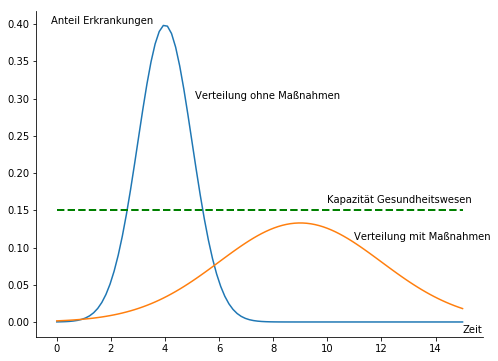

In [53]:
# covid-19 distributions
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(0, mu + 3*sigma + 12, 100)
y = [0.15] * 100
fig, ax = plt.subplots(figsize=(8, 6))

nom, = plt.plot(x, stats.norm.pdf(x - 4, mu, sigma))
wthm, = plt.plot(x, stats.norm.pdf(x - 9, 3*mu, 3*sigma))
cap, = plt.plot(x, y, 'go--', linewidth=2, markersize=0)
#plt.annotate('time', xy=(13,-0.1), xycoords='data')
ax.annotate('Zeit', xy=(15, -0.015))
ax.annotate('Anteil Erkrankungen', xy=(-0.2, 0.4))
ax.annotate('Kapazität Gesundheitswesen', xy=(10, 0.16))
ax.annotate('Verteilung ohne Maßnahmen', xy=(5.1, 0.3))
ax.annotate('Verteilung mit Maßnahmen', xy=(11, 0.11))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
    
plt.savefig('cv19.png', bbox_inches='tight', dpi=100)
plt.show()

In [8]:
"""Script demonstrating drawing of anti-aliased lines using Xiaolin Wu's line
algorithm
 
usage: python xiaolinwu.py [output-file]
 
"""
from __future__ import division
import sys
 
from PIL import Image
 
 
def _fpart(x):
    return x - int(x)
 
def _rfpart(x):
    return 1 - _fpart(x)
 
def putpixel(img, xy, color, alpha=1):
    """Paints color over the background at the point xy in img.
 
    Use alpha for blending. alpha=1 means a completely opaque foreground.
 
    """
    c = tuple(map(lambda bg, fg: int(round(alpha * fg + (1-alpha) * bg)),
                  img.getpixel(xy), color))
    img.putpixel(xy, c)
 
def draw_line(img, p1, p2, color):
    """Draws an anti-aliased line in img from p1 to p2 with the given color."""
    x1, y1 = p1
    x2, y2 = p2
    dx, dy = x2-x1, y2-y1
    steep = abs(dx) < abs(dy)
    p = lambda px, py: ((px,py), (py,px))[steep]
 
    if steep:
        x1, y1, x2, y2, dx, dy = y1, x1, y2, x2, dy, dx
    if x2 < x1:
        x1, x2, y1, y2 = x2, x1, y2, y1
 
    grad = dy/dx
    intery = y1 + _rfpart(x1) * grad
    def draw_endpoint(pt):
        x, y = pt
        xend = round(x)
        yend = y + grad * (xend - x)
        xgap = _rfpart(x + 0.5)
        px, py = int(xend), int(yend)
        putpixel(img, p(px, py), color, _rfpart(yend) * xgap)
        putpixel(img, p(px, py+1), color, _fpart(yend) * xgap)
        return px
 
    xstart = draw_endpoint(p(*p1)) + 1
    xend = draw_endpoint(p(*p2))
 
    for x in range(xstart, xend):
        y = int(intery)
        putpixel(img, p(x, y), color, _rfpart(intery))
        putpixel(img, p(x, y+1), color, _fpart(intery))
        intery += grad
 
 
if __name__ == '__main__':
    '''if len(sys.argv) != 2:
        print ('usage: python xiaolinwu.py [output-file]')
        sys.exit(-1)'''
    
    filename = 'drawtst0.jpg'
 
    blue = (0, 0, 255)
    yellow = (255, 255, 0)
    img = Image.new("RGB", (500,500), blue)
    for a in range(10, 431, 60):
        draw_line(img, (10, 10), (490, a), yellow)
        draw_line(img, (10, 10), (a, 490), yellow)
    draw_line(img, (10, 10), (490, 490), yellow)
    #filename = sys.argv[1]
    img.save(filename)
    print ('image saved to', filename)

image saved to drawtst0.jpg


In [1]:
# number puzzle
def fsum(e,s,t):
    return 1001*t + 100*e + 10*s - 101*e*s - 10*s*s - 10*e*e

if __name__ == '__main__':
    print(fsum(7,8,6))
    for e in range(1,10):
        for s in range(1,10):
            for t in range(1,10):
                if fsum(e,s,t) == 0:
                    print(e,s,t)

0
7 8 6


p: 0.9500774961251938


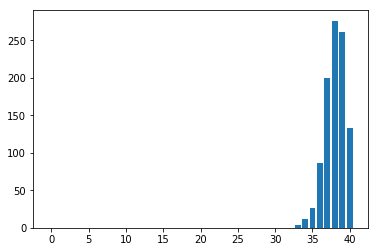

In [38]:
# Laplace's rule of succession
import random
import matplotlib.pyplot as plt
import numpy as np

def nrev(p, n):
    '''produce n reviews for p positive reviews'''
    return [0 if random.random() > p else 1 for x in range(n)]

if __name__ == '__main__':
    #print(nrev(0.95, 10))
    nticks = 40
    x = np.arange(nticks + 1)
    y = [0] * (nticks + 1)
    s = 0.95
    nruns = 1000
    for i in range(nruns):
        y[sum(nrev(s, nticks))] += 1
    plt.bar(x, height = y)
    #print(np.dot(y, x))
    print('p:', ((np.dot(y, x) + 1) / (nruns * nticks + 2)))